In [1]:
%cd "../fiberphotopy"

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [2]:
import fiber_data
import behavioral_data
import fp_utils
import analysis
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def rel():
    for i in [fp_utils,analysis,fiber_data,behavioral_data]:
        importlib.reload(i)
rel()

In [3]:
vgbz = analysis.MultiSession('../../DATA/J44')


Importing folder r11...
Importing ../../DATA/J44/r11/bsa_rec1_rat1120220401c20_01.dat...
Importing of ../../DATA/J44/r11/bsa_rec1_rat1120220401c20_01.dat finished in 0.07296562194824219 seconds
Analyzing peaks...


C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Importing of ../../DATA/J44/r11/AS21RSAxbaselineRat11_01042022_0.csv finished in 3.7786483764648438 seconds

Importing folder r12...
Importing ../../DATA/J44/r12/bsa_rec3_rat1220220401c20_01.dat...
Importing of ../../DATA/J44/r12/bsa_rec3_rat1220220401c20_01.dat finished in 0.030981779098510742 seconds
Analyzing peaks...
Importing of ../../DATA/J44/r12/AS21RSAxbaseline_Rat12_01042022_0.csv finished in 3.7446908950805664 seconds

Importing folder r5...
Importing ../../DATA/J44/r5/bsa_rec2_rat520220401c20_01.dat...
Importing of ../../DATA/J44/r5/bsa_rec2_rat520220401c20_01.dat finished in 0.03199172019958496 seconds
Analyzing peaks...
Importing of ../../DATA/J44/r5/AS21RSAxbaseline_Rat5_01042022_0.csv finished in 3.971818447113037 seconds
Importing ../../DATA/J44\r11\bsa_rec1_rat1120220401c20_01.dat...
Importing of ../../DATA/J44\r11\bsa_rec1_rat1120220401c20_01.dat finished in 0.06595945358276367 seconds
Importing ../../DATA/J44\r12\bsa_rec3_rat1220220401c20_01.dat...
Importing of ../..

# BEHAVIOR

## SUMMARY

### VGB 11

In [4]:
vgbz.rat_sessions['r11'].behavior.HLED_ON

[(2400.005, 3300.0)]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


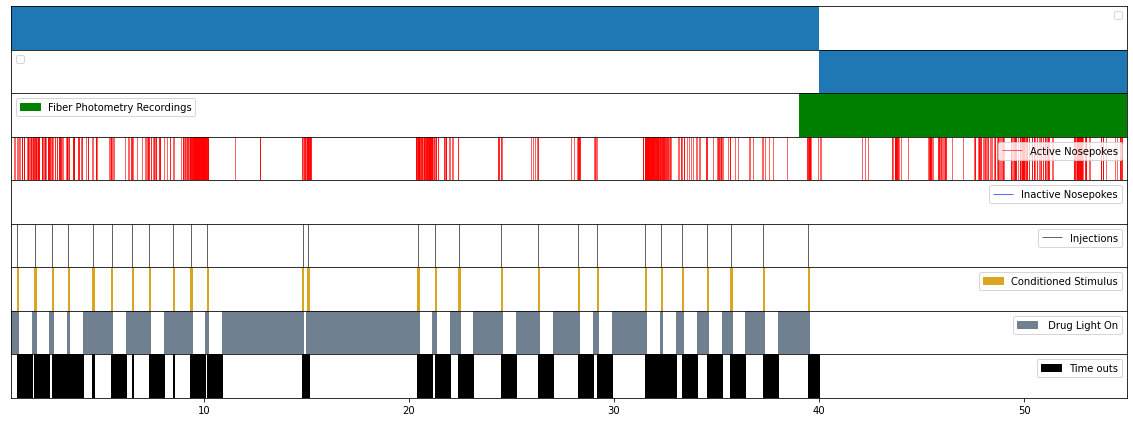

In [5]:
vgbz.rat_sessions['r11'].behavior.summary()

### VGB 5

No handles with labels found to put in legend.
No handles with labels found to put in legend.


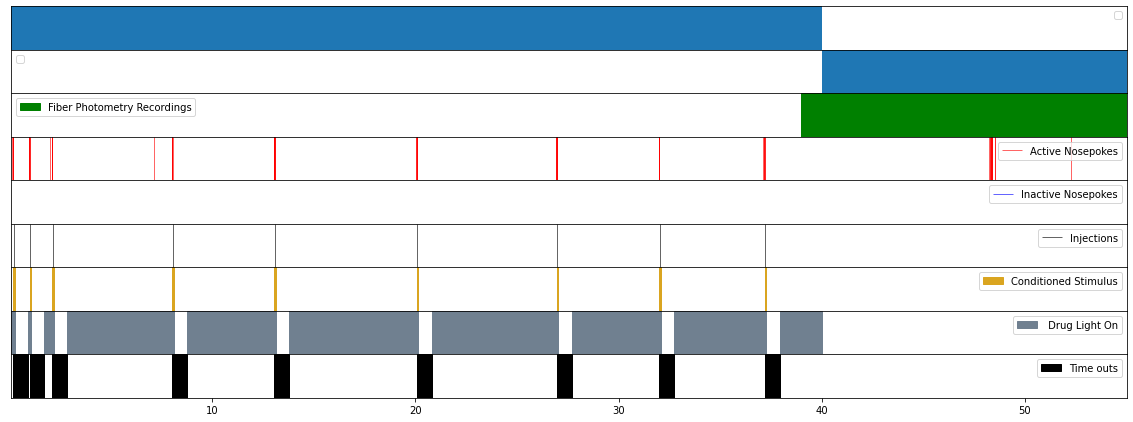

In [6]:
vgbz.rat_sessions['r5'].behavior.summary()

### VGB 12

No handles with labels found to put in legend.
No handles with labels found to put in legend.


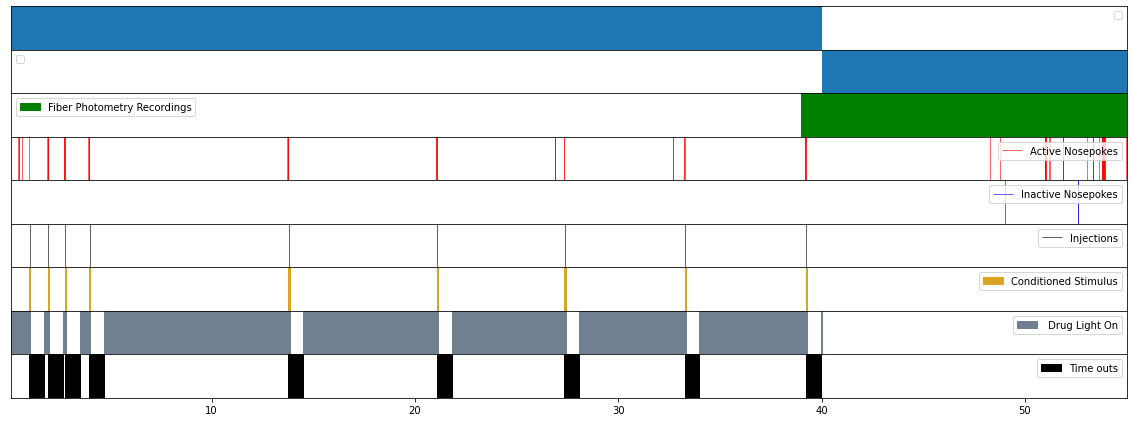

In [7]:
vgbz.rat_sessions['r12'].behavior.summary()

## ACTIVE NOSEPOKES

array([[  0,   0,   0, ..., 812, 812, 812],
       [  0,   0,   0, ...,  78,  79,  79],
       [  0,   0,   0, ...,  71,  71,  71]], dtype=int64)

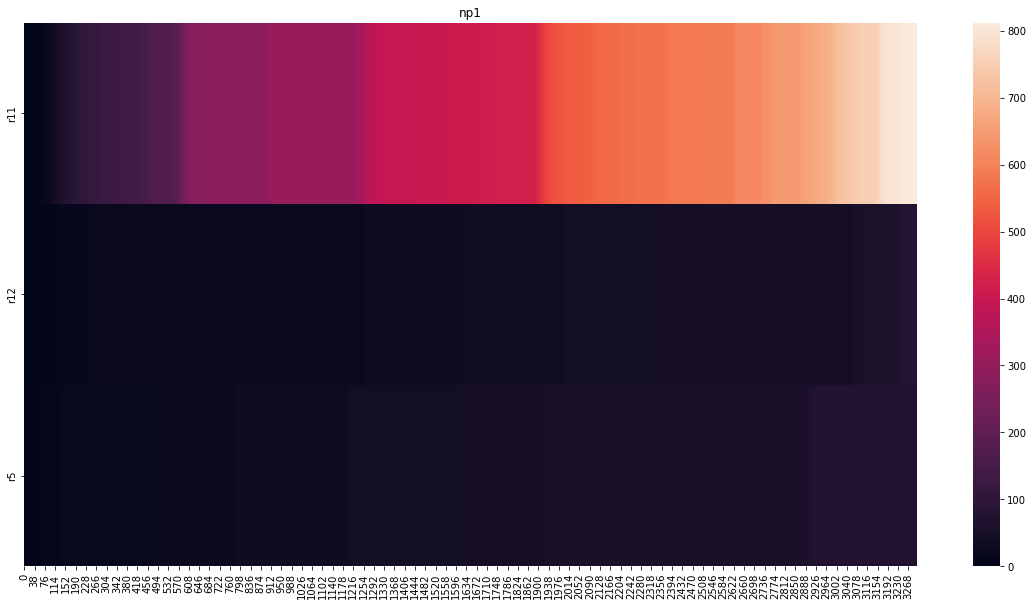

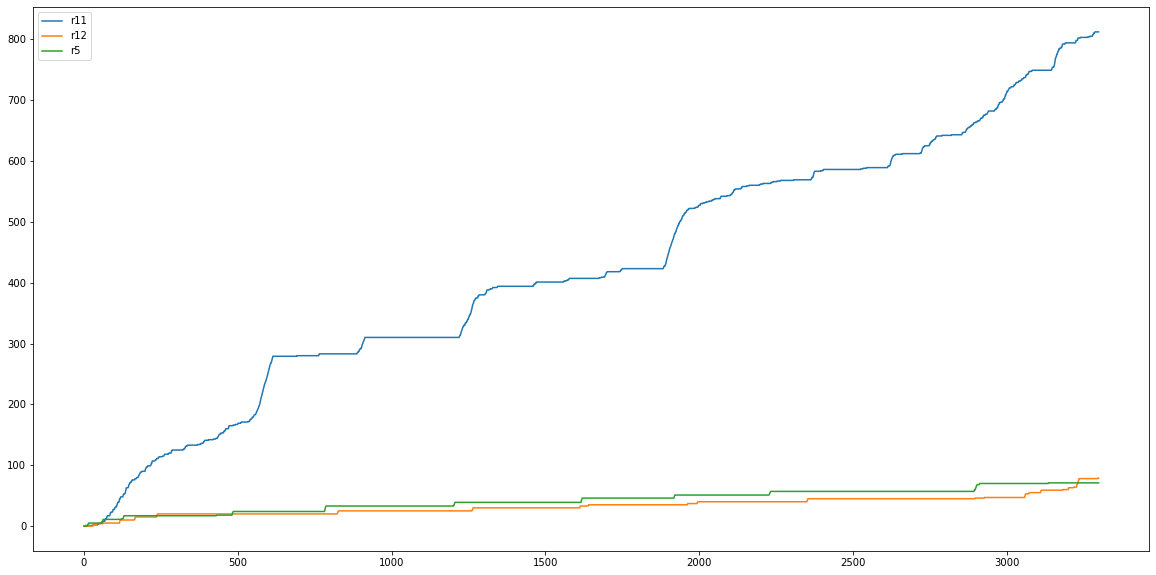

In [8]:
vgbz.compare_behavior('np1')

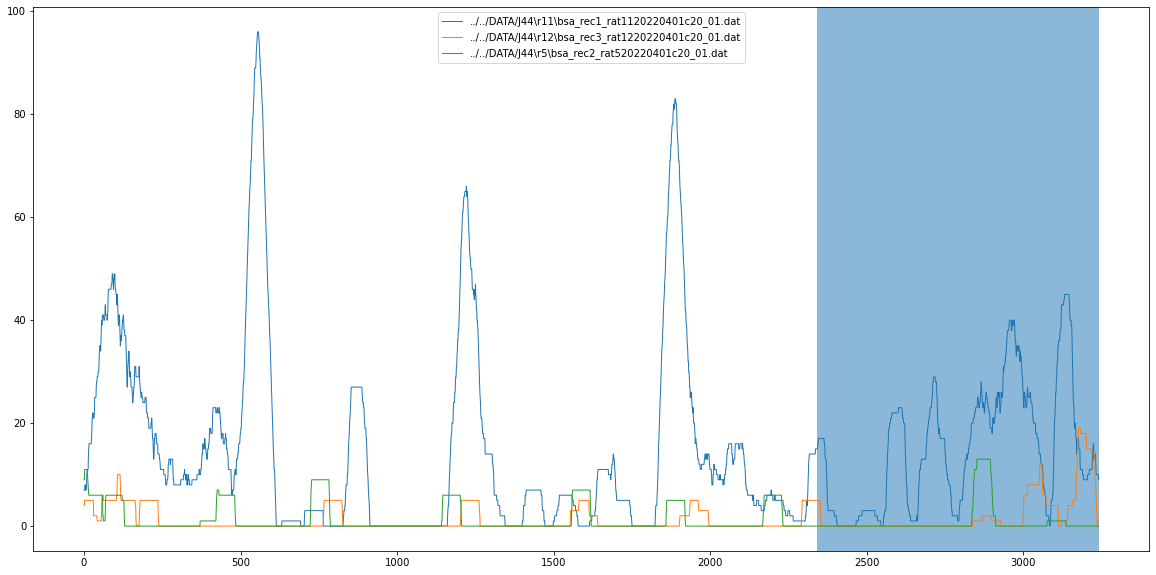

In [9]:
vgbz.multibehavior.show_rate('np1',binsize=60,percentiles=False) # NPA/min

## INACTIVE NOSEPOKES

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

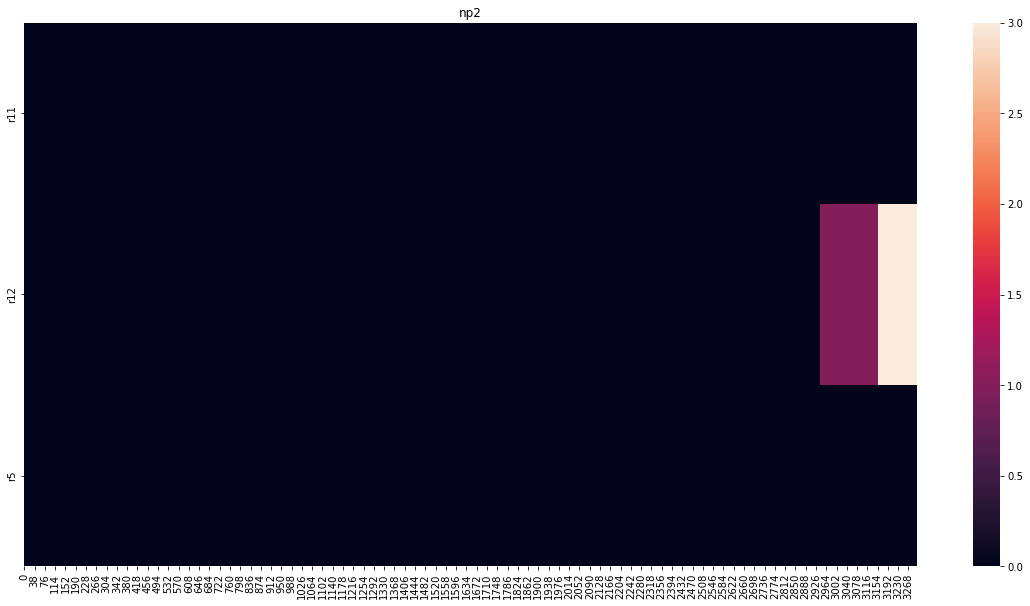

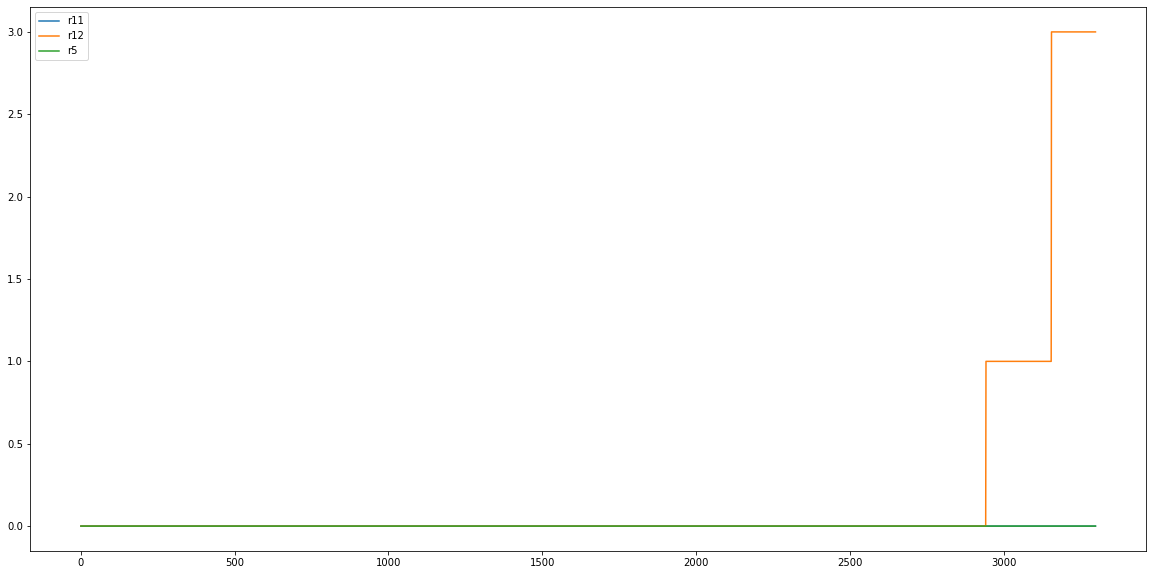

In [10]:
vgbz.compare_behavior('np2')

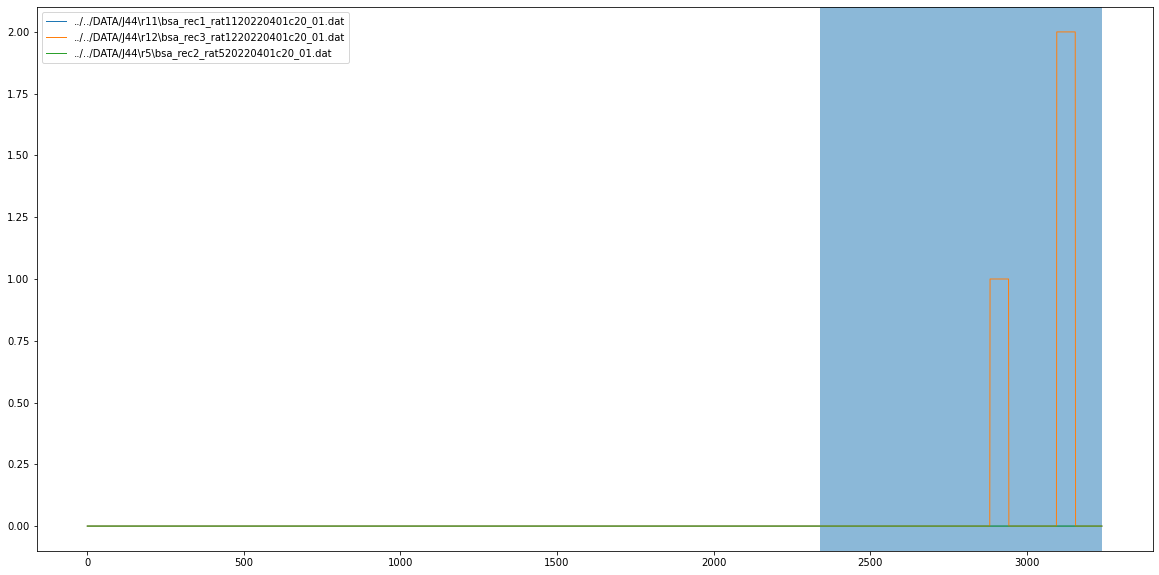

In [11]:
vgbz.multibehavior.show_rate('np2',binsize=60,percentiles=False) # NPB/min

## INJECTIONS

array([[ 0,  0,  0, ..., 27, 27, 27],
       [ 0,  0,  0, ...,  9,  9,  9],
       [ 0,  0,  0, ...,  9,  9,  9]], dtype=int64)

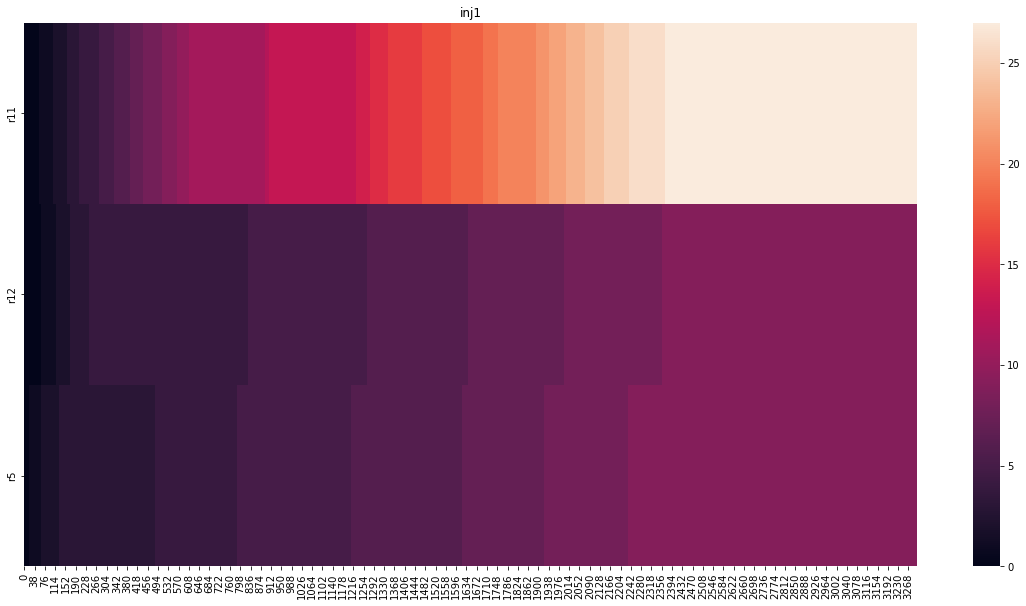

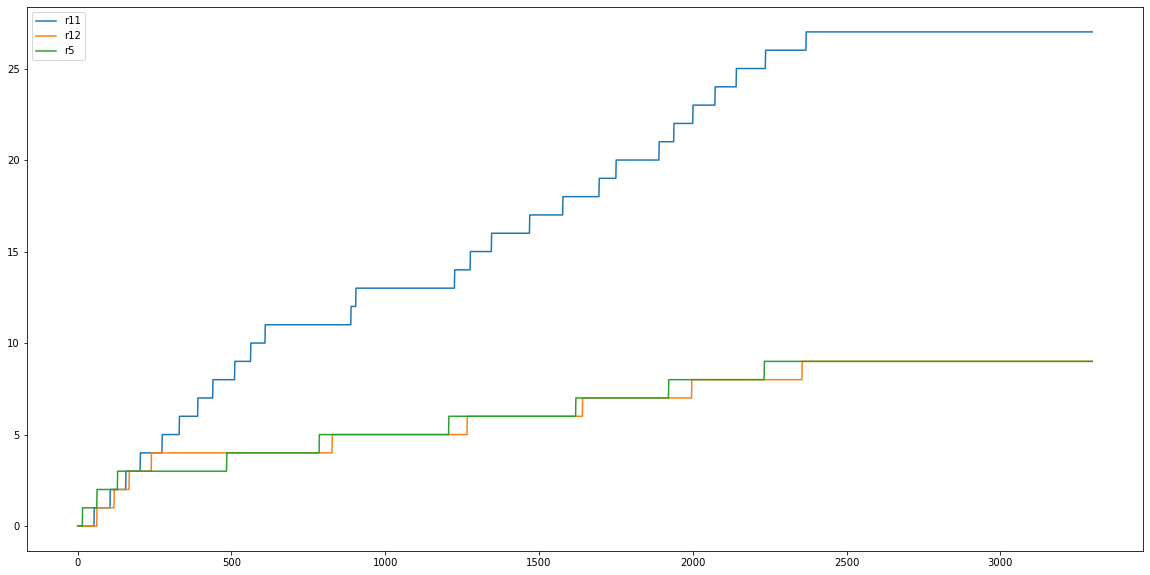

In [12]:
vgbz.compare_behavior('inj1')

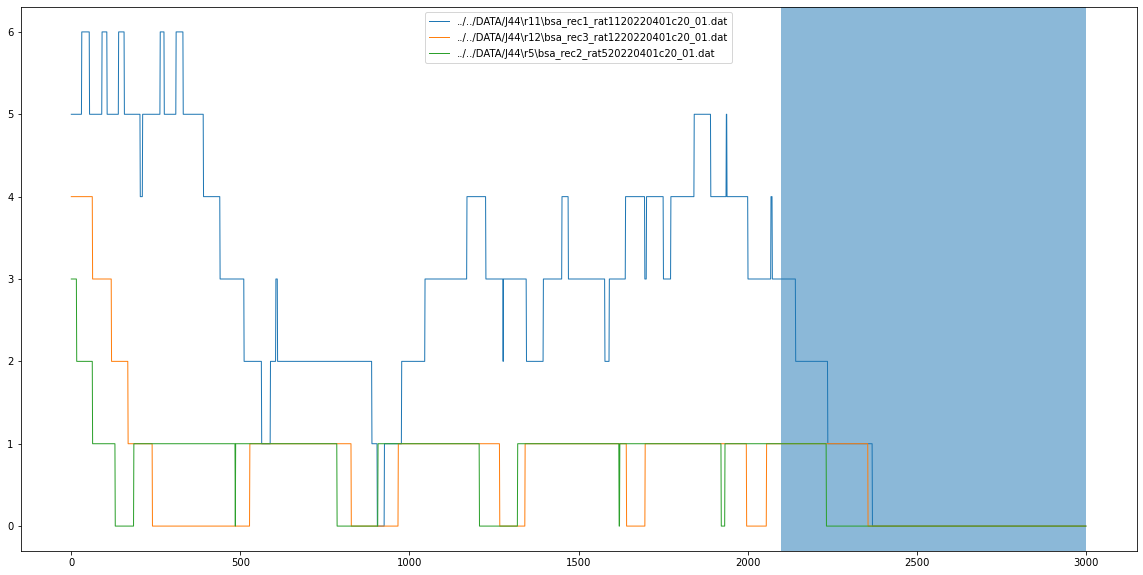

In [13]:
vgbz.multibehavior.show_rate('inj1',binsize=300,percentiles=False) # inj/5min

# PERIEVENT

## SWITCH DRUG TO NO DRUG

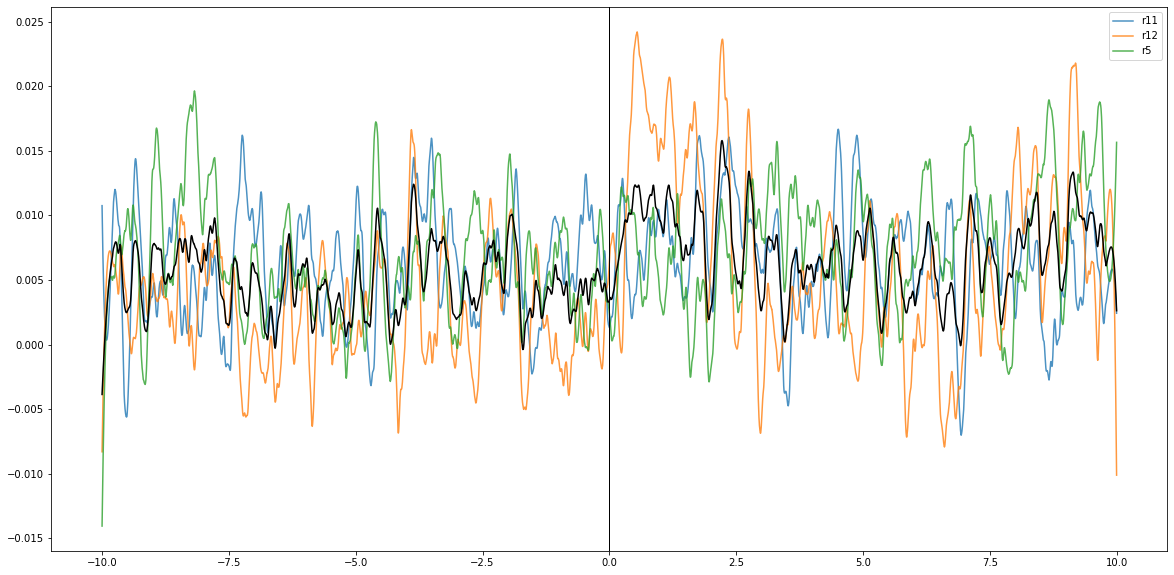

In [14]:
fifo = vgbz.analyze(["switch_d_nd","switch_to_nd"])
fifo.plot(alpha=0.8,label=True)

In [15]:
pd.DataFrame({key: fifo.__dict__[key] for key in ['preAVG_Z', 'postAVG_Z', 'preAVG_RZ', 'postAVG_RZ', 'pre_raw_AUC', 'post_raw_AUC', 'preAUC', 'postAUC', 'preZ_AUC', 'postZ_AUC', 'preRZ_AUC', 'postRZ_AUC']},
index = fifo.__dict__['rat_sessions'])

,preAVG_Z,postAVG_Z,preAVG_RZ,postAVG_RZ,pre_raw_AUC,post_raw_AUC,preAUC,postAUC,preZ_AUC,postZ_AUC,preRZ_AUC,postRZ_AUC
r11,1.341973e-16,0.109664,-0.032886,0.141335,1.134602,1.134950,0.058320,0.067765,-0.001444,1.097207,-0.331129,1.414247
r12,-6.094552e-17,0.550594,0.099904,0.947454,1.009640,1.013579,0.024903,0.070254,0.002263,5.506250,1.002452,9.475017
r5,-3.281682e-17,0.187681,0.024310,0.295454,0.943875,0.944232,0.062203,0.078157,-0.000908,1.876503,0.241777,2.954097


# PEAKS

In [16]:
rats = ['r11','r5','r12']
df = pd.concat([pd.DataFrame({k:pd.Series(v) for k,v in vgbz.rat_sessions[r].fiber.peakFA(2350,3295).items() if type(v)==float}) for r in rats])
df.index = rats
df

,frequency,mean zscore,mean dF/F,max zscore,max dF/F
r11,2.324868,1.926454,0.017740,5.383847,0.049577
r5,2.225397,1.952455,0.019960,4.120205,0.042120
r12,2.278307,1.958702,0.019653,4.289396,0.043040


### VGB11 : all detected peaks

(0.0, 7.0)

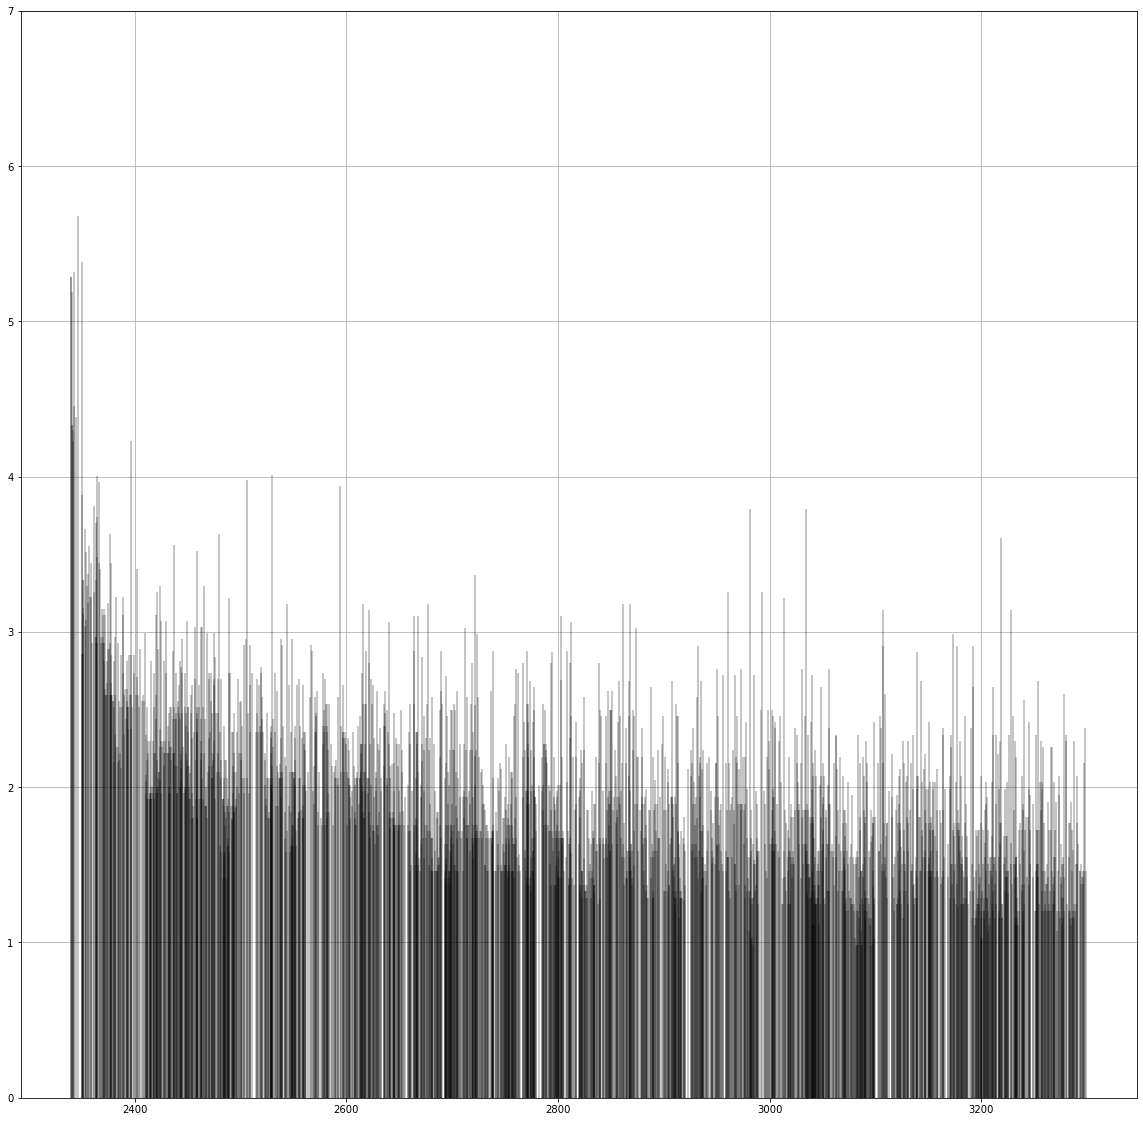

In [17]:
vgbz.rat_sessions['r11'].fiber.plot_transients()
plt.ylim((0,7))

### VGB5 : all detected peaks

(0.0, 7.0)

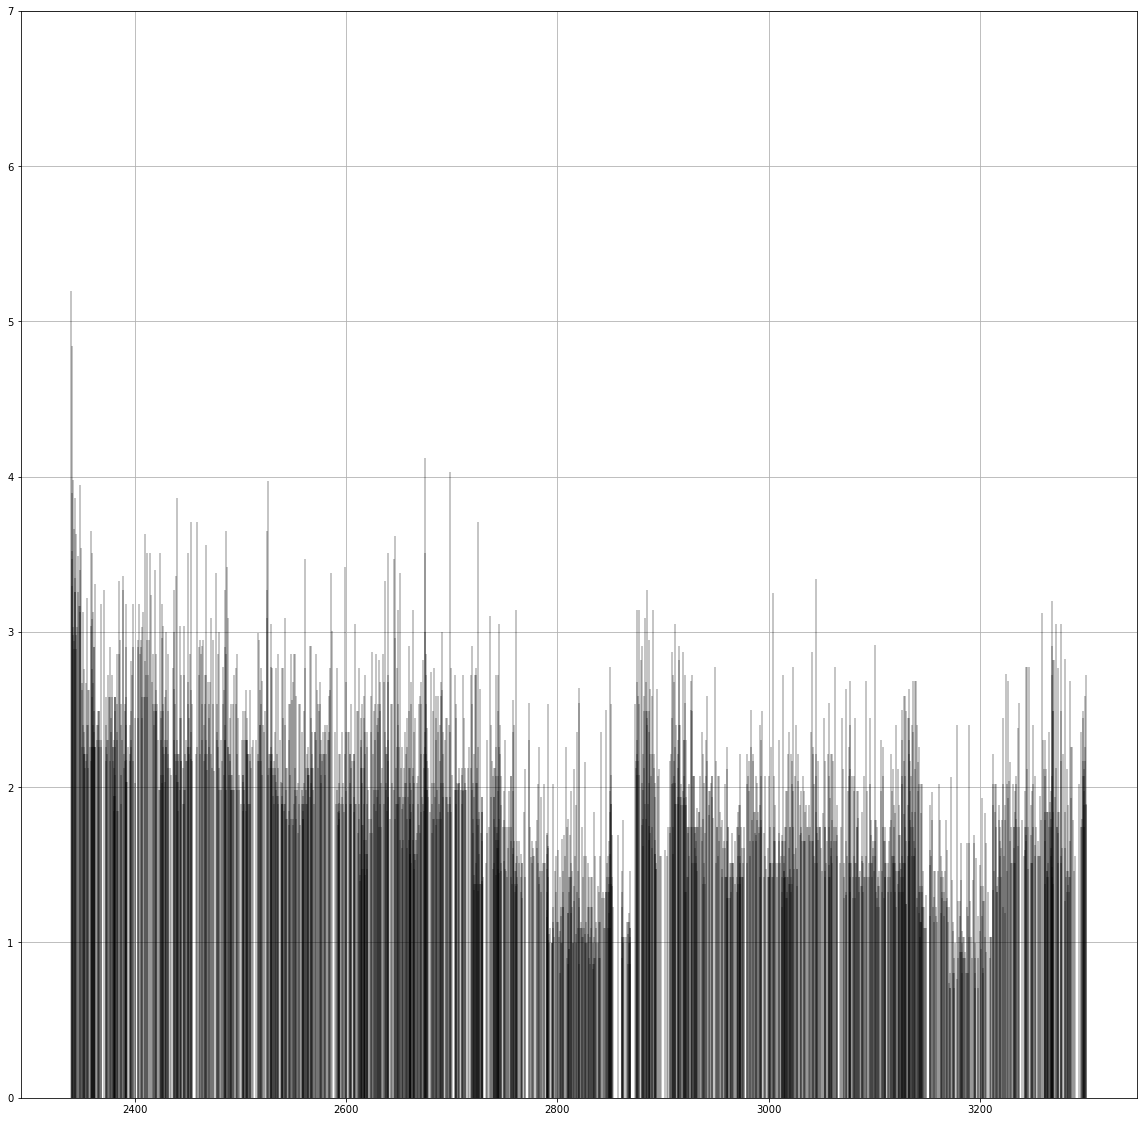

In [18]:
vgbz.rat_sessions['r5'].fiber.plot_transients()
plt.ylim((0,7))

### VGB12 : all detected peaks

(0.0, 7.0)

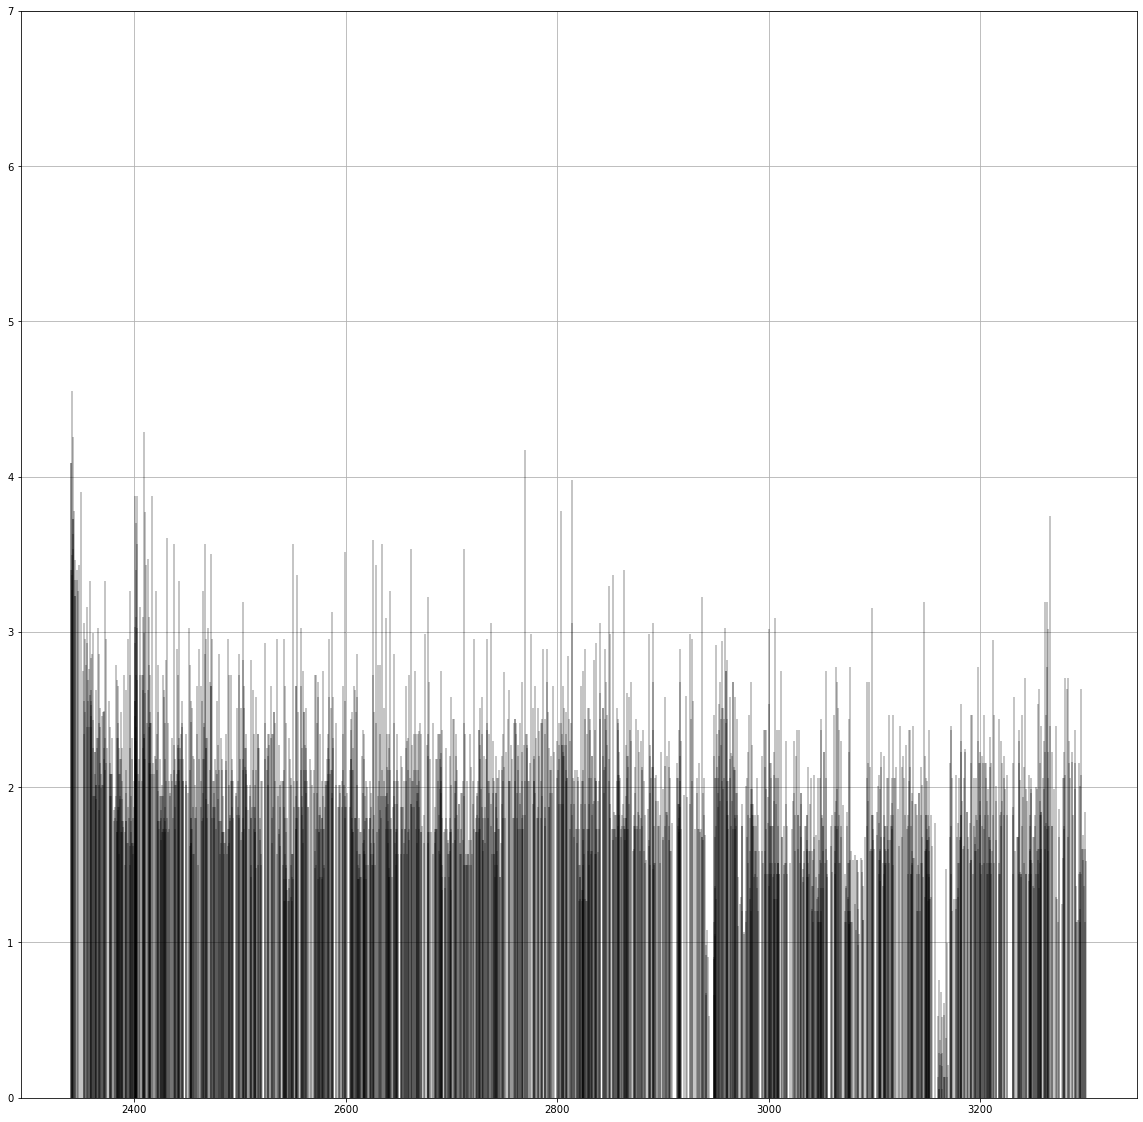

In [19]:
vgbz.rat_sessions['r12'].fiber.plot_transients()
plt.ylim((0,7))

In [20]:
j44 = analysis.MultiSession('../../DATA/J44')
j42 = analysis.MultiSession('../../DATA/J42')


Importing folder r11...
Importing ../../DATA/J44/r11/bsa_rec1_rat1120220401c20_01.dat...
Importing of ../../DATA/J44/r11/bsa_rec1_rat1120220401c20_01.dat finished in 0.07295560836791992 seconds
Analyzing peaks...


C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Importing of ../../DATA/J44/r11/AS21RSAxbaselineRat11_01042022_0.csv finished in 4.030424356460571 seconds

Importing folder r12...
Importing ../../DATA/J44/r12/bsa_rec3_rat1220220401c20_01.dat...
Importing of ../../DATA/J44/r12/bsa_rec3_rat1220220401c20_01.dat finished in 0.028980255126953125 seconds
Analyzing peaks...
Importing of ../../DATA/J44/r12/AS21RSAxbaseline_Rat12_01042022_0.csv finished in 3.8546245098114014 seconds

Importing folder r5...
Importing ../../DATA/J44/r5/bsa_rec2_rat520220401c20_01.dat...
Importing of ../../DATA/J44/r5/bsa_rec2_rat520220401c20_01.dat finished in 0.02798318862915039 seconds
Analyzing peaks...
Importing of ../../DATA/J44/r5/AS21RSAxbaseline_Rat5_01042022_0.csv finished in 3.801656484603882 seconds
Importing ../../DATA/J44\r11\bsa_rec1_rat1120220401c20_01.dat...
Importing of ../../DATA/J44\r11\bsa_rec1_rat1120220401c20_01.dat finished in 0.07095503807067871 seconds
Importing ../../DATA/J44\r12\bsa_rec3_rat1220220401c20_01.dat...
Importing of ../../

In [21]:
jbase = analysis.MultiSession('../../DATA/Jbase')


Importing folder rat_11_SA_8...
Importing ../../DATA/Jbase/rat_11_SA_8/bsa25032022c20_01.dat...
Importing of ../../DATA/Jbase/rat_11_SA_8/bsa25032022c20_01.dat finished in 0.1594383716583252 seconds
Analyzing peaks...
Importing of ../../DATA/Jbase/rat_11_SA_8/AS21RSA8Rat1125032022_0.csv finished in 1.7769200801849365 seconds

Importing folder rat_12_SA_7...
Importing ../../DATA/Jbase/rat_12_SA_7/bsaRat12_28032022c20_01.dat...
Importing of ../../DATA/Jbase/rat_12_SA_7/bsaRat12_28032022c20_01.dat finished in 0.047971487045288086 seconds
Analyzing peaks...
Importing of ../../DATA/Jbase/rat_12_SA_7/AS21RSA7Rat1228032022_0.csv finished in 2.194819211959839 seconds

Importing folder rat_5_SA_7...
Importing ../../DATA/Jbase/rat_5_SA_7/bsa28032022c20_01.dat...
Importing of ../../DATA/Jbase/rat_5_SA_7/bsa28032022c20_01.dat finished in 0.048946380615234375 seconds
Analyzing peaks...
Importing of ../../DATA/Jbase/rat_5_SA_7/AS21RSAxRat528032022_0.csv finished in 2.3279225826263428 seconds
Import

In [22]:
jbase.names

['rat_11_SA_8', 'rat_12_SA_7', 'rat_5_SA_7']

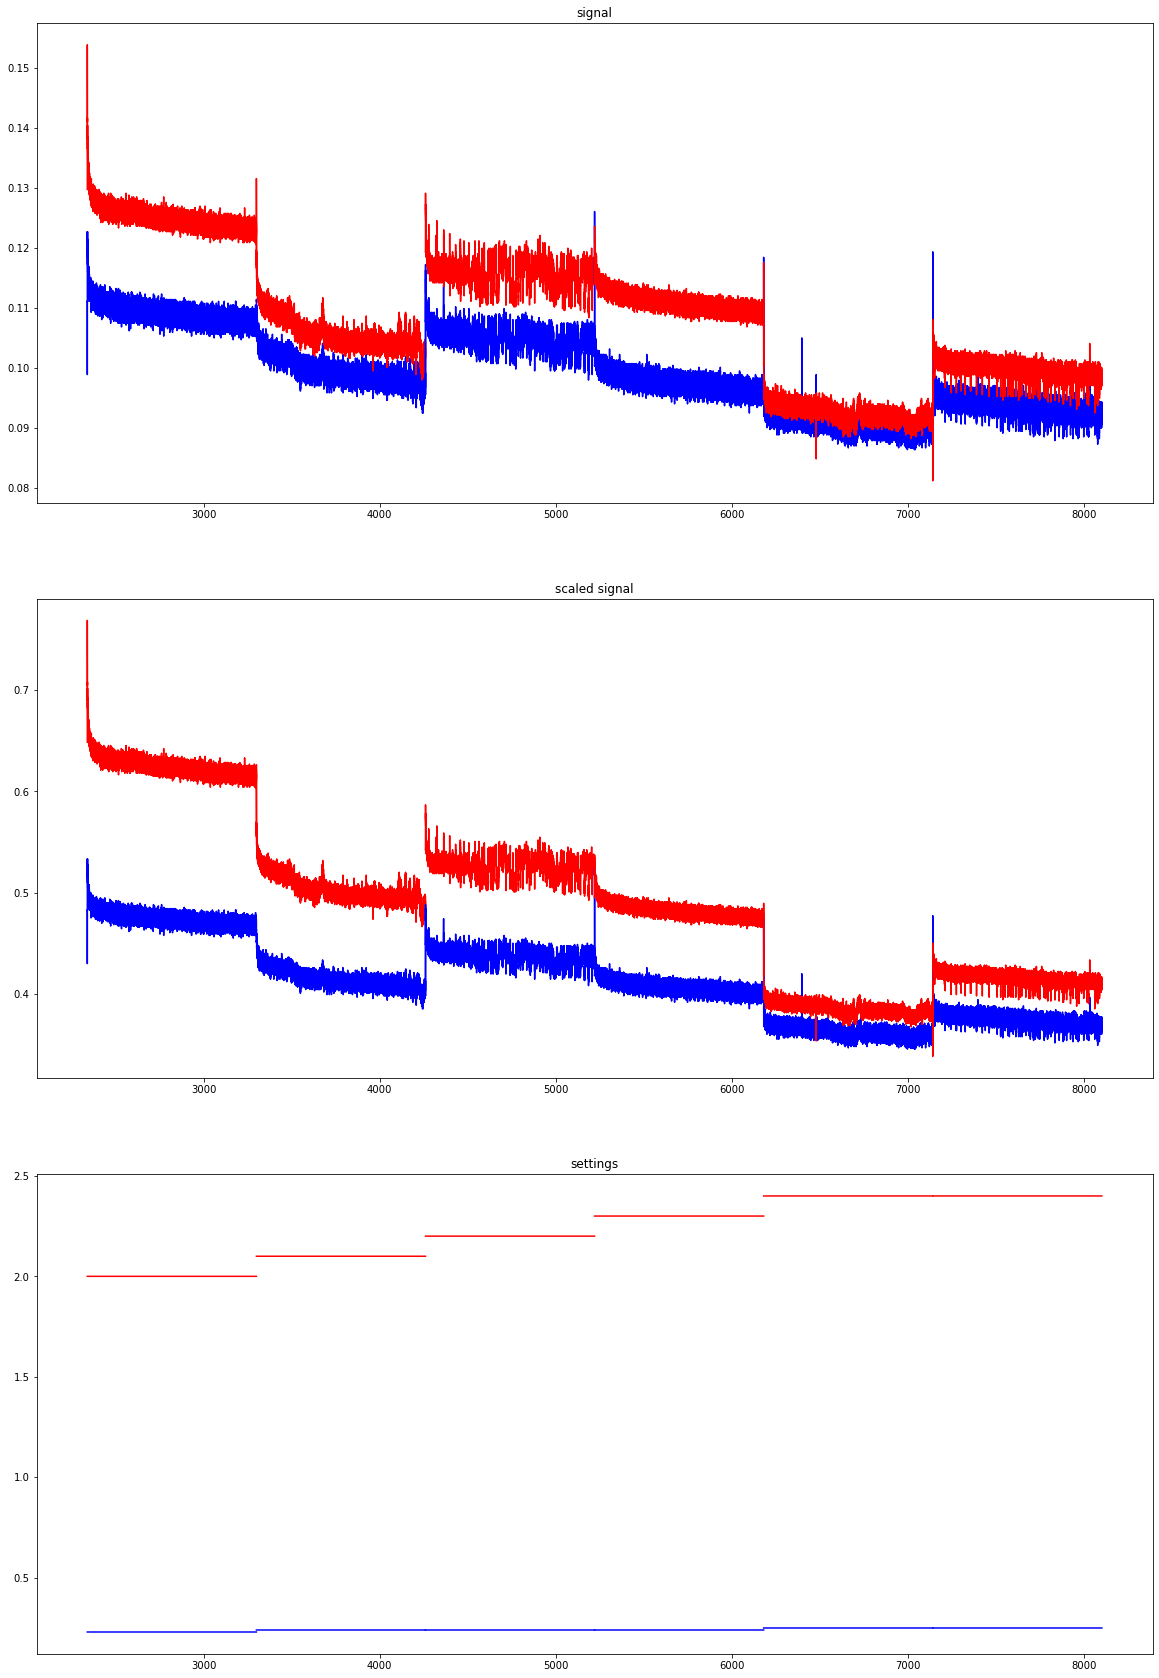

In [23]:
ord1,ord2 = ('vgb11','vgb5','vgb12'),('r11','r5','r12')
val1,val2 = ((2.0,0.23),(2.1,0.24),(2.2,0.24)), ((2.3,0.24),(2.4,0.25),(2.4,0.25))

def plotter(obj1,obj2,ord1,ord2,val1,val2):
    fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(20,30))
    offset = 0
    for obj,order,val in (obj1,ord1,val1),(obj2,ord2,val2):
        for n,i in enumerate(order):
            res = obj.rat_sessions[i].fiber.norm(method='raw')
            time = res[:,0] + offset
            cad  = res[:,1]
            iso  = res[:,2]
            ax1.plot(time,iso,c='b')
            ax1.plot(time,cad,c='r')
            ax1.set_title('signal')
            ax2.plot(time,iso/val[n][-1],c='b')
            ax2.plot(time,10*cad/val[n][0],c='r')
            ax2.set_title('scaled signal')
            ax3.plot(time,[val[n][-1]]*len(time),c='b')
            ax3.plot(time,[val[n][0]]*len(time),c='r')
            ax3.set_title('settings')
            offset += time[-1] - time[0]

plotter(j42,j44,ord1,ord2,val1,val2)

In [24]:
test = fiber_data.FiberData('../../DATA/AS21R/rat_10_SA_1/AS21RSA1Rat1002032022_0.csv')

Analyzing peaks...


C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Importing of ../../DATA/AS21R/rat_10_SA_1/AS21RSA1Rat1002032022_0.csv finished in 3.0358424186706543 seconds


In [25]:
test.name

'AS21RSA1Rat1002032022_0'

In [26]:
import dateutil.parser as dparser
import datetime

In [27]:
def detect_date(word):
    a = word.split('2022')[0][-4:]
    date = datetime.datetime(year=2022,month=int(a[2:4]),day=int(a[:2]))
    return date

In [28]:
import os

In [31]:
%cd "s://Datas équipe Deroche/Eq-DEROCHE_1.hbk/Datas/Rats/2021/Fiber Photometry/AS21R/Fiber Photometry/Raw Data"

signal = {'iso':[],'cad':[],'sess':[]}
index = []

path1 = "c://Users/mceau/Documents/DATA/AS21R/"
path2 = "c://Users/mceau/Documents/DATA/J42/"
path3 = "c://Users/mceau/Documents/DATA/J44/"

for session in os.listdir(path1):
    for file in os.listdir(path1+session):
        if file[-4:] == '.csv':
            filename = path1+session+'/'+file
            print(filename)
            print(detect_date(filename))
            df =pd.read_csv(filename,usecols=['AIn-2 - Demodulated(Lock-In)','AIn-1 - Demodulated(Lock-In)'])
            signal['iso'].append(df['AIn-2 - Demodulated(Lock-In)'].mean())
            signal['cad'].append(df['AIn-1 - Demodulated(Lock-In)'].mean())
            signal['sess'].append(filename)
            index.append(detect_date(filename))
for session in os.listdir(path2):
    for file in os.listdir(path2+session):
        if file[-4:] == '.csv':
            filename = path2+session+'/'+file
            print(filename)
            print(detect_date(filename))
            df =pd.read_csv(filename,usecols=['AIn-2 - Demodulated(Lock-In)','AIn-1 - Demodulated(Lock-In)'])
            signal['iso'].append(df['AIn-2 - Demodulated(Lock-In)'].mean())
            signal['cad'].append(df['AIn-1 - Demodulated(Lock-In)'].mean())
            signal['sess'].append(filename)
            index.append(detect_date(filename))
for session in os.listdir(path3):
    for file in os.listdir(path3+session):
        if file[-4:] == '.csv':
            filename = path3+session+'/'+file
            print(filename)
            print(detect_date(filename))
            df =pd.read_csv(filename,usecols=['AIn-2 - Demodulated(Lock-In)','AIn-1 - Demodulated(Lock-In)'])
            signal['iso'].append(df['AIn-2 - Demodulated(Lock-In)'].mean())
            signal['cad'].append(df['AIn-1 - Demodulated(Lock-In)'].mean())
            signal['sess'].append(filename)
            index.append(detect_date(filename))
for folder in os.listdir('.'):
    for file in os.listdir(folder):
        if file[-4:] == '.csv':
            filename = folder +'/'+file
            print(filename)
            print(detect_date(filename))
            df =pd.read_csv(filename,usecols=['AIn-2 - Demodulated(Lock-In)','AIn-1 - Demodulated(Lock-In)'])
            signal['iso'].append(df['AIn-2 - Demodulated(Lock-In)'].mean())
            signal['cad'].append(df['AIn-1 - Demodulated(Lock-In)'].mean())
            signal['sess'].append(filename)
            index.append(detect_date(filename))          
index = [i+datetime.timedelta(hours=1) for i in index]          
df1 = pd.DataFrame(signal,index=index)

s:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas\Rats\2021\Fiber Photometry\AS21R\Fiber Photometry\Raw Data
c://Users/mceau/Documents/DATA/AS21R/rat_10_SA_1/AS21RSA1Rat1002032022_0.csv
2022-03-02 00:00:00
c://Users/mceau/Documents/DATA/AS21R/rat_10_SA_2/AS21RSA2Rat1008032022_0.csv
2022-03-08 00:00:00
c://Users/mceau/Documents/DATA/AS21R/rat_11_SA_1/AS21RSA1Rat1103032022_0.csv
2022-03-03 00:00:00
c://Users/mceau/Documents/DATA/AS21R/rat_11_SA_2/AS21RSA2Rat1109032022_0.csv
2022-03-09 00:00:00
c://Users/mceau/Documents/DATA/AS21R/rat_11_SA_3/AS21RSA3Rat1111032022_0.csv
2022-03-11 00:00:00
c://Users/mceau/Documents/DATA/AS21R/rat_11_SA_4/AS21RSA4Rat1115032022_0.csv
2022-03-15 00:00:00
c://Users/mceau/Documents/DATA/AS21R/rat_11_SA_5/AS21RSA5Rat1117032022_0.csv
2022-03-17 00:00:00
c://Users/mceau/Documents/DATA/AS21R/rat_11_SA_6/AS21RSA6Rat1122032022_0.csv
2022-03-22 00:00:00
c://Users/mceau/Documents/DATA/AS21R/rat_11_SA_7/AS21RSA7Rat1124032022_0.csv
2022-03-24 00:00:00
c://Users/mceau/Docum

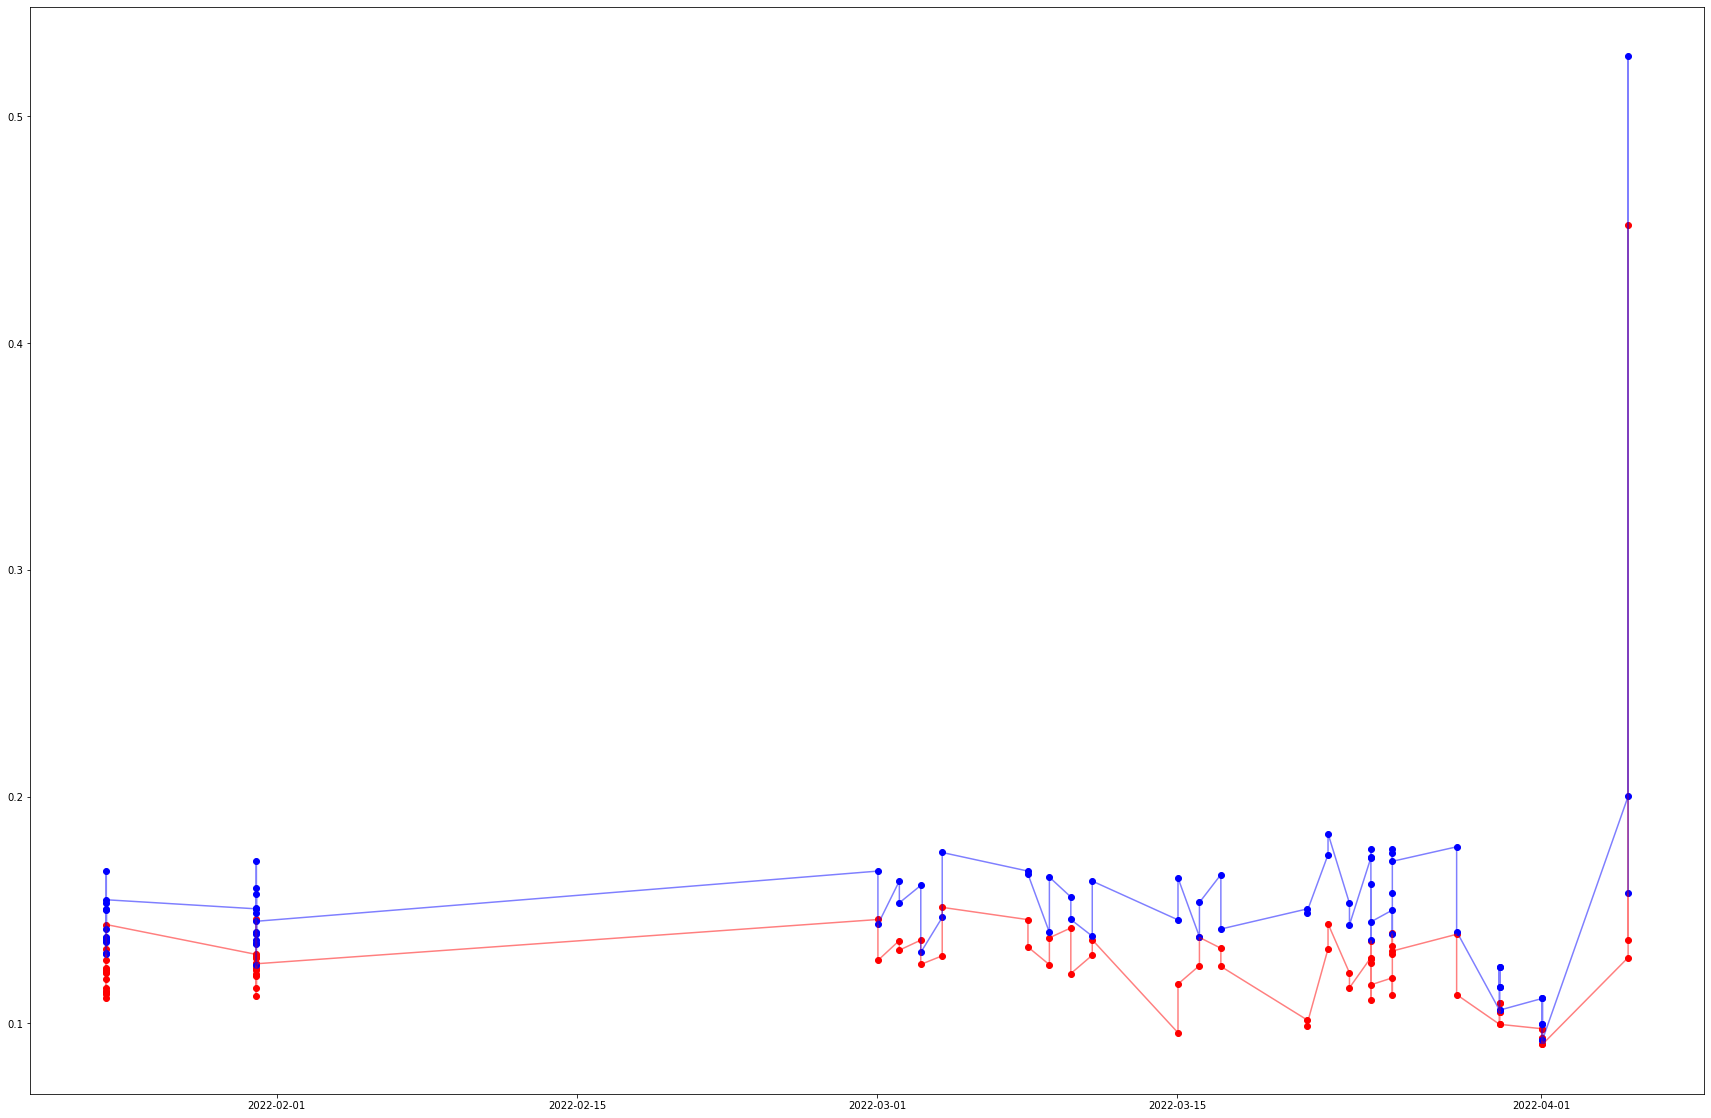

In [32]:
df1.sort_index(inplace=True)
fig,ax = plt.subplots(1,figsize=(30,20))
#df1.plot(y=['iso','cad'])
import matplotlib.dates as mdates
ax.scatter(df1.index,df1['iso'],c='r')
ax.scatter(df1.index,df1['cad'],c='b')
ax.plot(df1.index,df1['iso'],c='r',alpha=0.5)
ax.plot(df1.index,df1['cad'],c='b',alpha=0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

In [ ]:
df

In [ ]:
%cd "s://Datas équipe Deroche/Eq-DEROCHE_1.hbk/Datas/Rats/2021/Fiber Photometry/AS21R/Fiber Photometry/Raw Data"

In [ ]:
%ls